In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read data
y_train = pd.read_csv('y_train.csv')
x_train = pd.read_csv('x_train.csv')
x_testdata = pd.read_csv('x_test.csv')

In [3]:
y_train.head()

series_id  group_id        surface
0          0        13  fine_concrete
1          1        31       concrete
2          2        20       concrete
3          3        31       concrete
4          4        22     soft_tiles

In [4]:
y_train.surface.value_counts()

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

In [5]:
y_train.shape

(3810, 3)

In [6]:
x_train.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0       -0.75853       -0.63435   
1    0_1          0                   1       -0.75853       -0.63434   
2    0_2          0                   2       -0.75853       -0.63435   
3    0_3          0                   3       -0.75852       -0.63436   
4    0_4          0                   4       -0.75852       -0.63435   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.10488       -0.10597            0.107650            0.017561   
1       -0.10490       -0.10600            0.067851            0.029939   
2       -0.10492       -0.10597            0.007275            0.028934   
3       -0.10495       -0.10597           -0.013053            0.019448   
4       -0.10495       -0.10596            0.005135            0.007652   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0            0.000767               -0.74857                 2.1030   
1            0.003385                0.33995                 1.5064   
2           -0.005978               -0.26429                 1.5922   
3           -0.008974                0.42684                 1.0993   
4            0.005245               -0.50969                 1.4689   

   linear_acceleration_Z  
0                -9.7532  
1                -9.4128  
2                -8.7267  
3               -10.0960  
4               -10.4410

In [7]:
x_train.head().transpose()

0          1          2          3          4
row_id                        0_0        0_1        0_2        0_3        0_4
series_id                       0          0          0          0          0
measurement_number              0          1          2          3          4
orientation_X            -0.75853   -0.75853   -0.75853   -0.75852   -0.75852
orientation_Y            -0.63435   -0.63434   -0.63435   -0.63436   -0.63435
orientation_Z            -0.10488    -0.1049   -0.10492   -0.10495   -0.10495
orientation_W            -0.10597     -0.106   -0.10597   -0.10597   -0.10596
angular_velocity_X        0.10765   0.067851  0.0072747  -0.013053  0.0051349
angular_velocity_Y       0.017561   0.029939   0.028934   0.019448  0.0076517
angular_velocity_Z     0.00076741  0.0033855 -0.0059783 -0.0089735  0.0052452
linear_acceleration_X    -0.74857    0.33995   -0.26429    0.42684   -0.50969
linear_acceleration_Y       2.103     1.5064     1.5922     1.0993     1.4689
linear_acceleration_Z     -9.7532    -9.4128    -8.7267    -10.096    -10.441

In [8]:
x_train.shape

(487680, 13)

In [9]:
x_testdata.head()

row_id  series_id  measurement_number  orientation_X  orientation_Y  \
0    0_0          0                   0      -0.025773       -0.98864   
1    0_1          0                   1      -0.025683       -0.98862   
2    0_2          0                   2      -0.025617       -0.98861   
3    0_3          0                   3      -0.025566       -0.98862   
4    0_4          0                   4      -0.025548       -0.98866   

   orientation_Z  orientation_W  angular_velocity_X  angular_velocity_Y  \
0       -0.14801       0.003350           -0.006524           -0.001071   
1       -0.14816       0.003439           -0.113960            0.083987   
2       -0.14826       0.003571           -0.080518            0.114860   
3       -0.14817       0.003609            0.070067            0.033820   
4       -0.14792       0.003477            0.152050           -0.029016   

   angular_velocity_Z  linear_acceleration_X  linear_acceleration_Y  \
0           -0.027390                0.10043                 4.2061   
1           -0.060590               -0.70889                 3.9905   
2           -0.037177                1.45710                 2.2828   
3           -0.035904                0.71096                 1.8582   
4           -0.015314                3.39960                 2.7881   

   linear_acceleration_Z  
0                -5.5439  
1                -8.0273  
2               -11.2990  
3               -12.2270  
4               -10.4100

# Preparing Training Data

In [10]:
x_train['angular_velocity'] = np.sqrt(x_train.angular_velocity_X**2 + x_train.angular_velocity_Y**2 + x_train.angular_velocity_Z**2)

In [11]:
x_train['linear_acceleration'] = np.sqrt (x_train.linear_acceleration_X**2 + x_train.linear_acceleration_Y**2 + x_train.linear_acceleration_Z**2)

In [12]:
t3 = 2. * (x_train.orientation_W * x_train.orientation_Z + x_train.orientation_X * x_train.orientation_Y)
t4 = 1. - 2. * (x_train.orientation_Y**2 + x_train.orientation_Z**2)
x_train['yaw'] =  np.arctan2(t3, t4)

In [13]:
sinr_cosp = 2. * (x_train.orientation_W * x_train.orientation_X + x_train.orientation_Y * x_train.orientation_Z)
cosr_cosp = 1. - 2. * (x_train.orientation_X**2 + x_train.orientation_X**2)
x_train['roll'] = np.arctan2(sinr_cosp, cosr_cosp)

In [14]:
sinp = 2. * (x_train.orientation_W * x_train.orientation_Y + x_train.orientation_Z * x_train.orientation_X)
sinp[sinp>1] = 1
sinp[sinp<-1] = -1
x_train['pitch'] = np.arcsin(sinp)

Series #5, surface: tiled


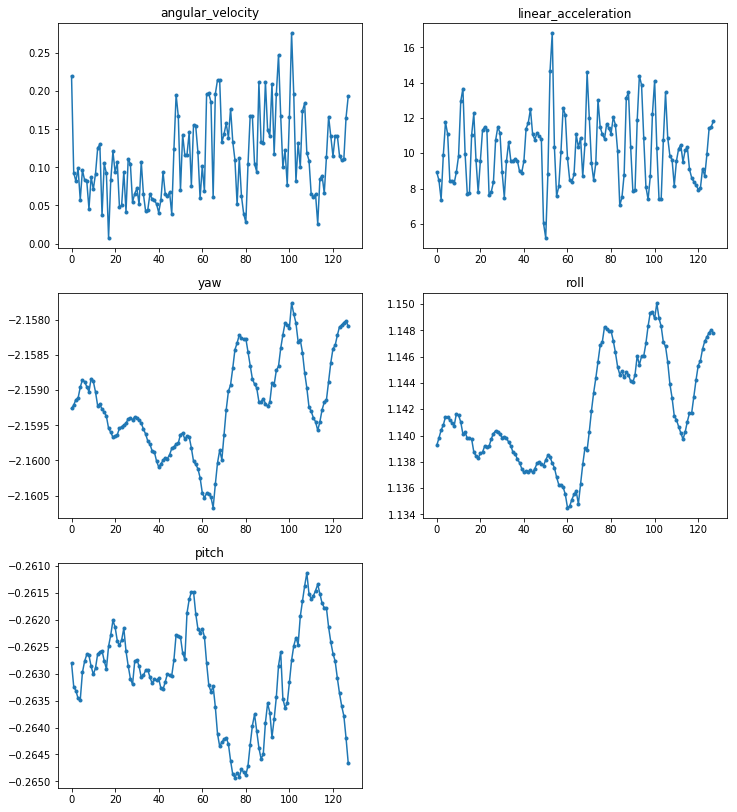

In [15]:
computed_cols = ['angular_velocity', 'linear_acceleration', 'yaw', 'roll', 'pitch']

series = 5
df = x_train[x_train.series_id==series]
surface = y_train[y_train.series_id==series].surface.iloc[0]
print("Series #%d, surface: %s" %(series, surface))

plt.figure(figsize=(12,24))

for i, col in enumerate(computed_cols):
    plt.subplot(5, 2, i+1)
    plt.plot(df.measurement_number, df[col], '.-')
    plt.title(col)

# Preparing Test Data

In [16]:
x_testdata['angular_velocity'] = np.sqrt (x_testdata.angular_velocity_X**2 + x_testdata.angular_velocity_Y**2 + x_testdata.angular_velocity_Z**2)

In [17]:
x_testdata['linear_acceleration'] = np.sqrt (x_testdata.linear_acceleration_X**2 + x_testdata.linear_acceleration_Y**2 + x_testdata.linear_acceleration_Z**2)

In [18]:
t3 = 2. * (x_testdata.orientation_W * x_testdata.orientation_Z + x_testdata.orientation_X * x_testdata.orientation_Y)
t4 = 1. - 2. * (x_testdata.orientation_Y**2 + x_testdata.orientation_Z**2)
x_testdata['yaw'] = np.arctan2(t3,t4)

In [19]:
sinr_cosp = 2. * (x_testdata.orientation_W * x_testdata.orientation_X + x_testdata.orientation_Y * x_testdata.orientation_Z)
cosr_cosp = 1. - 2. * (x_testdata.orientation_X**2 + x_testdata.orientation_X**2)
x_testdata['roll'] = np.arctan2(sinr_cosp, cosr_cosp)

In [20]:
sinp = 2. * (x_testdata.orientation_W * x_testdata.orientation_Y + x_testdata.orientation_Z * x_testdata.orientation_X)
sinp[sinp>1] = 1
sinp[sinp<-1] = -1
x_testdata['pitch'] = np.arcsin(sinp)

Series #5, surface: tiled


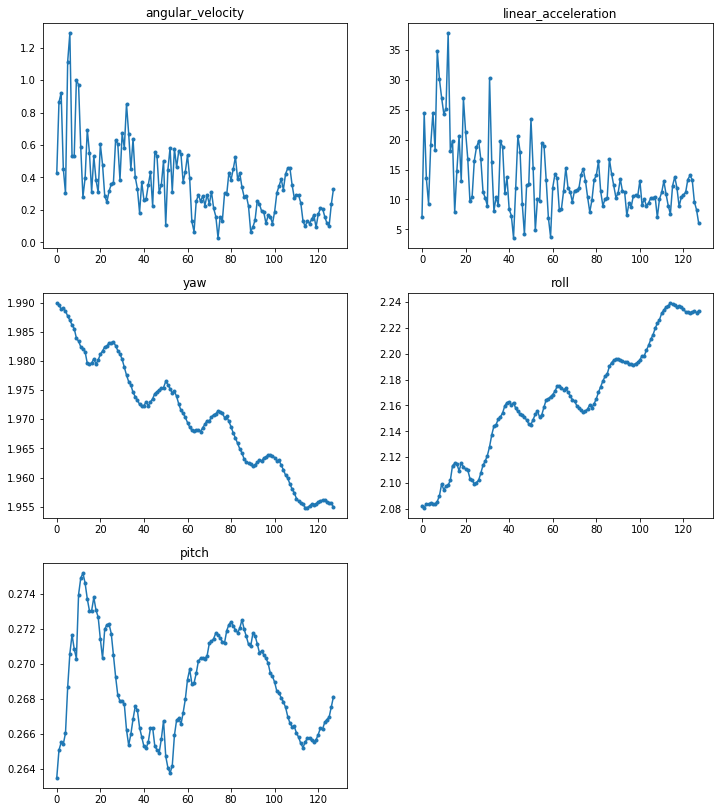

In [21]:
computed_cols = ['angular_velocity', 'linear_acceleration', 'yaw', 'roll', 'pitch']

series = 5
df = x_testdata[x_testdata.series_id==series]
surface = y_train[y_train.series_id==series].surface.iloc[0]
print("Series #%d, surface: %s" %(series, surface))

plt.figure(figsize=(12,24))

for i, col in enumerate(computed_cols):
    plt.subplot(5, 2, i+1)
    plt.plot(df.measurement_number, df[col], '.-')
    plt.title(col)

In [22]:
x_train.measurement_number.max()

127

In [23]:
(x_train.groupby('series_id')['measurement_number'].max()==127).all()

True

In [24]:
x_train.isnull().any()

row_id                   False
series_id                False
measurement_number       False
orientation_X            False
orientation_Y            False
orientation_Z            False
orientation_W            False
angular_velocity_X       False
angular_velocity_Y       False
angular_velocity_Z       False
linear_acceleration_X    False
linear_acceleration_Y    False
linear_acceleration_Z    False
angular_velocity         False
linear_acceleration      False
yaw                      False
roll                     False
pitch                    False
dtype: bool

In [25]:
n_series = x_train.shape[0]//128
n_series

3810

In [26]:
n_series * 128 == x_train.shape[0]

True

In [27]:
y_train.shape

(3810, 3)

In [28]:
(y_train.series_id == np.arange(n_series)).all()

True

In [29]:
(x_train.series_id == (np.arange((n_series*128))//128)).all()

True

In [30]:
(x_train.measurement_number == (np.arange((n_series*128)) %128)).all()

True

In [31]:
x_arr = x_train[x_train.columns[1:]].values

In [32]:
x_arr.shape

(487680, 17)

In [33]:
x = x_arr.reshape((n_series, 128, x_arr.shape[1]))

In [34]:
x[:,:,0].astype(int)

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ...,
       [3807, 3807, 3807, ..., 3807, 3807, 3807],
       [3808, 3808, 3808, ..., 3808, 3808, 3808],
       [3809, 3809, 3809, ..., 3809, 3809, 3809]])

In [35]:
(x[:,:,0].astype(int).transpose() == np.arange(n_series)).all()

True

In [36]:
(x[:,:,1].astype(int) == np.arange(128)).all()

True

In [37]:
X = x[:,:,2:]

In [38]:
X.shape

(3810, 128, 15)

Text(0.5, 1.0, 'tiled roll')

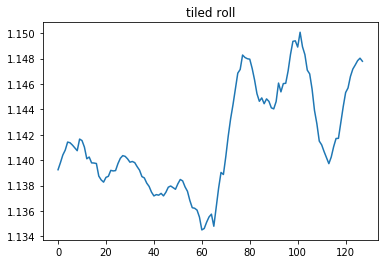

In [39]:
series = 5
feature = -2
plt.plot(X[series,:,feature])
plt.title(y_train.surface[series] + ' ' + x_train.columns[feature])

In [40]:
aggregates = pd.DataFrame()
aggregates['mean_linear_acceleration'] = x_train.groupby('series_id').linear_acceleration.mean()
aggregates['std_linear_acceleration'] = x_train.groupby('series_id').linear_acceleration.std()

In [41]:
aggregates.head()

mean_linear_acceleration  std_linear_acceleration
series_id                                                   
0                          9.939676                 0.989642
1                         10.082444                 1.826016
2                         10.035741                 0.944637
3                         10.888094                 3.102236
4                          9.892815                 0.765162

In [42]:
means = np.mean(X,axis =1)
means.shape

(3810, 15)

In [43]:
stds = np.std(X,axis =1)
stds.shape

(3810, 15)

# Data Processing

In [44]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

encoded_label = lb.fit_transform(y_train.surface)
encoded_label.shape

(3810,)

In [45]:
from keras.utils.np_utils import to_categorical

train_label = to_categorical(encoded_label)
train_label.shape

(3810, 9)

In [46]:
train_data = np.array(x_train.drop(columns=['row_id', 'series_id', 'measurement_number'])).reshape(-1, 128, x_train.shape[1]-3)
train_data.shape

(3810, 128, 15)

train_dataI  -= means
train_data /= stds

In [47]:
test_data = np.array(x_testdata.drop(columns=['row_id', 'series_id', 'measurement_number'])).reshape(-1, 128, x_train.shape[1]-3)
test_data.shape

(3816, 128, 15)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.20)

In [49]:
x_train.shape[2]

15

In [50]:
x_test.shape

(762, 128, 15)

In [51]:
y_train.shape

(3048, 9)

In [52]:
y_test.shape

(762, 9)

In [53]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv1D(32, 7, activation='relu', input_shape=(128, 15)))
model.add(layers.MaxPooling1D(7, 2))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_hinge',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=300,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 3048 samples, validate on 762 samples
Epoch 1/300
3048/3048 [==============================] - 2s - loss: 1.4055 - acc: 0.1115 - val_loss: 1.2483 - val_acc: 0.1995
Epoch 2/300
3048/3048 [==============================] - 0s - loss: 1.1862 - acc: 0.2270 - val_loss: 1.1775 - val_acc: 0.2349
Epoch 3/300
3048/3048 [==============================] - 0s - loss: 1.1465 - acc: 0.3140 - val_loss: 1.1684 - val_acc: 0.2730
Epoch 4/300
3048/3048 [==============================] - 0s - loss: 1.1304 - acc: 0.3173 - val_loss: 1.1227 - val_acc: 0.3071
Epoch 5/300
3048/3048 [==============================] - 0s - loss: 1.0989 - acc: 0.3471 - val_loss: 1.1023 - val_acc: 0.3202
Epoch 6/300
3048/3048 [==============================] - 0s - loss: 1.0757 - acc: 0.3714 - val_loss: 1.0

3048/3048 [==============================] - 0s - loss: 0.7172 - acc: 0.6191 - val_loss: 0.8000 - val_acc: 0.5722
Epoch 58/300
3048/3048 [==============================] - 0s - loss: 0.7106 - acc: 0.6230 - val_loss: 0.7963 - val_acc: 0.5696
Epoch 59/300
3048/3048 [==============================] - 0s - loss: 0.7015 - acc: 0.6306 - val_loss: 0.7997 - val_acc: 0.5761
Epoch 60/300
3048/3048 [==============================] - 0s - loss: 0.7000 - acc: 0.6263 - val_loss: 0.7893 - val_acc: 0.5761
Epoch 61/300
3048/3048 [==============================] - 0s - loss: 0.6947 - acc: 0.6358 - val_loss: 0.7923 - val_acc: 0.5722
Epoch 62/300
3048/3048 [==============================] - 0s - loss: 0.6900 - acc: 0.6417 - val_loss: 0.7891 - val_acc: 0.5814
Epoch 63/300
3048/3048 [==============================] - 0s - loss: 0.6895 - acc: 0.6362 - val_loss: 0.7877 - val_acc: 0.5761
Epoch 64/300
3048/3048 [==============================] - 0s - loss: 0.6828 - acc: 0.6457 - val_loss: 0.7851 - val_acc: 0.58

3048/3048 [==============================] - 0s - loss: 0.5435 - acc: 0.7375 - val_loss: 0.7078 - val_acc: 0.6496
Epoch 122/300
3048/3048 [==============================] - 0s - loss: 0.5411 - acc: 0.7369 - val_loss: 0.7053 - val_acc: 0.6496
Epoch 123/300
3048/3048 [==============================] - 0s - loss: 0.5402 - acc: 0.7388 - val_loss: 0.7043 - val_acc: 0.6404
Epoch 124/300
3048/3048 [==============================] - 0s - loss: 0.5384 - acc: 0.7382 - val_loss: 0.7141 - val_acc: 0.6470
Epoch 125/300
3048/3048 [==============================] - 0s - loss: 0.5400 - acc: 0.7369 - val_loss: 0.6965 - val_acc: 0.6496
Epoch 126/300
3048/3048 [==============================] - 0s - loss: 0.5303 - acc: 0.7421 - val_loss: 0.6972 - val_acc: 0.6535
Epoch 127/300
3048/3048 [==============================] - 0s - loss: 0.5313 - acc: 0.7454 - val_loss: 0.6972 - val_acc: 0.6575
Epoch 128/300
3048/3048 [==============================] - 0s - loss: 0.5317 - acc: 0.7444 - val_loss: 0.6990 - val_ac

3048/3048 [==============================] - 0s - loss: 0.4472 - acc: 0.7890 - val_loss: 0.6392 - val_acc: 0.6903
Epoch 186/300
3048/3048 [==============================] - 0s - loss: 0.4480 - acc: 0.7874 - val_loss: 0.6318 - val_acc: 0.6942
Epoch 187/300
3048/3048 [==============================] - 0s - loss: 0.4484 - acc: 0.7887 - val_loss: 0.6446 - val_acc: 0.6785
Epoch 188/300
3048/3048 [==============================] - 0s - loss: 0.4488 - acc: 0.7841 - val_loss: 0.6259 - val_acc: 0.6982
Epoch 189/300
3048/3048 [==============================] - 0s - loss: 0.4446 - acc: 0.7897 - val_loss: 0.6244 - val_acc: 0.6955
Epoch 190/300
3048/3048 [==============================] - 0s - loss: 0.4381 - acc: 0.7907 - val_loss: 0.6256 - val_acc: 0.7008
Epoch 191/300
3048/3048 [==============================] - 0s - loss: 0.4367 - acc: 0.7910 - val_loss: 0.6304 - val_acc: 0.6982
Epoch 192/300
3048/3048 [==============================] - 0s - loss: 0.4395 - acc: 0.7936 - val_loss: 0.6274 - val_ac

3048/3048 [==============================] - 0s - loss: 0.3998 - acc: 0.8117 - val_loss: 0.5966 - val_acc: 0.7073
Epoch 250/300
3048/3048 [==============================] - 0s - loss: 0.3937 - acc: 0.8117 - val_loss: 0.5875 - val_acc: 0.7165
Epoch 251/300
3048/3048 [==============================] - 0s - loss: 0.3847 - acc: 0.8163 - val_loss: 0.5904 - val_acc: 0.7152
Epoch 252/300
3048/3048 [==============================] - 0s - loss: 0.3858 - acc: 0.8176 - val_loss: 0.6044 - val_acc: 0.7047
Epoch 253/300
3048/3048 [==============================] - 0s - loss: 0.3930 - acc: 0.8130 - val_loss: 0.5955 - val_acc: 0.7100
Epoch 254/300
3048/3048 [==============================] - 0s - loss: 0.3865 - acc: 0.8140 - val_loss: 0.5961 - val_acc: 0.7073
Epoch 255/300
3048/3048 [==============================] - 0s - loss: 0.3870 - acc: 0.8186 - val_loss: 0.5852 - val_acc: 0.7139
Epoch 256/300
3048/3048 [==============================] - 0s - loss: 0.3843 - acc: 0.8117 - val_loss: 0.5862 - val_ac

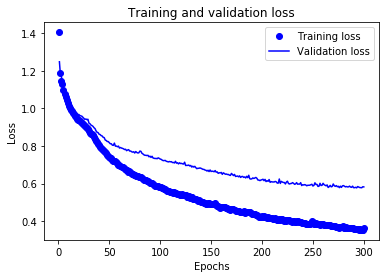

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

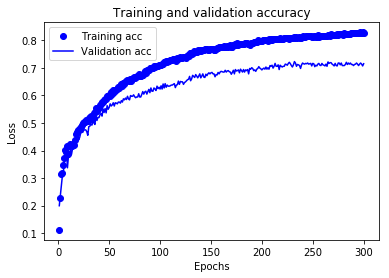

In [55]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
result = model.predict(test_data).argmax(axis=1)

In [57]:
prediction = lb.inverse_transform(result)

In [58]:
prediction.shape

(3816,)

In [59]:
x_testdata.shape

(488448, 18)

In [60]:
submission = pd.read_csv('sample_submission.csv')
submission['surface'] = prediction

In [61]:
submission.to_csv('submission.csv', header=True, index=False)